## Filtros Resposta Infinita ao Impulso

Vamos denominar Infinite Response Impulse Reponse (IIR), que são caracterizados pelas equações:
$$ y(n) = \sum_{k=0}^{N-1}b_k x(n-k) - \sum_{k=1}^M a_k y(n-k)$$
$$ H(z) = \frac{\sum_{k=0}^{N-1}b_kz^{-k}}{1 + \sum_{k=1}^{M}a_kz^{-k}}$$
sendo $b_k$ e $a_k$ os coeficientes que definem o filtro. 

Características:
1. A saída atual depende das entradas atual e anteriores, e das saída anteriores;
2. Filtros IIR nem sempre são estáveis;
3. Não há garantia de fase linear;

Dadas as especificações do filtro (tipo, tolerâncias nas bandas de passagem e rejeição), deve-se utilizar um método para determinar os coeficientes. Alguns desses métodos serão explorados a seguir.

### <font color='blue'> Método do cálculo pelo posicionamento de pólos e zeros </color>

O posicionamento dos pólos e zeros no plano $z$ modificam a resposta em frequência do sistema, por exemplo, um zero em determinada localização produzirá um zero na frequência correspondente, e um pólo um pico. A posição em relação ao círculo unitário também influencia na resposta. Na figura abaixo estes fatos estão representados.

![title](img/Fig83Ifeachor.png)


Deve-se levar em conta que para que os coeficiente do filtros sejam número reais (isso facilita a implementação), os pólos e zero devem ser reais ou ocorrerem em pares conjugados complexos.

Vamos considerar um filtro passa-faixas com as seguintes especificações:

1. Rejeição em DC e 250 Hz;
2. Faixa de passagem centrada em 125 Hz;
3. Uma largura de banda de 3dB de 10 Hz;
4. Frequência de amostragem de 500 Hz.

Primeiro precisamos determinar onde colocar os pólos e os zeros:

1. Rejeição em DC colocaremos um zero em $0^o$, para 250 Hz em $360^o \times 250/500 = 180^o$, ambas sobre o círculo unitário.
2. Para a banda de passagem faremos $\pm 360^{o} \times 125/500 = \pm 90^{o}$, que devem ser complexos conjugados. O raio $r$ onde os pólos serão colocados depende da banda de passagem desejada, e pode ser aproximado por $$r \approx 1 - (BW/Fs)\pi,$$ e para o problema chega-se a $r = 0,937$.

Por inspeção podemos escrever
$$ H(z) = \frac{(z-1)(z+1)}{(z - re^{j\pi/2})(z - re^{-j\pi/2})} = \frac{z^2 -1}{z^2 + 0,877969} = \frac{1 - z^{-2}}{1 + 0,877969z^{-2}}.$$

Que pode ser implementada em uma estrutura como está representada na Figura abaixo.

![title](img/fig84Ifeachor.png)

Alguns software necessitam quem sejam informados os coefcientes do filtro no formato $b_k$ e $a_k$. Inspecionando a função de transferência $H(z)$ chegamos a:
1. $b_0 = 1$, $b_1 = 0$, $b_2 = -1$;
2. $a_1 = 0$, $a_2 = 0,877969$.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


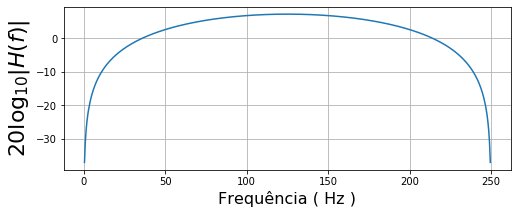

In [9]:
from __future__ import  division
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
import scipy as scp

fs = 500

b = [1, 0, -1]
a = [0, 0.877696]


w,H = signal.freqz(b,a) # resposta em frequência

fig,ax = plt.subplots()
fig.set_size_inches((8,3))

ax.plot(w/np.pi*fs/2.,20*np.log10(abs(H)))
ax.set_xlabel("Frequência ( Hz )",fontsize=16)
ax.set_ylabel(r"$20\log_{10} |H(f)| $",fontsize=22)
ymin,ymax = -80,5

ax.grid()

### <font color='blue'> Método do cálculo pela invariância ao impulso </color>

Busca transformar um função do tempo contínuo $h_c(t)$ para outra no tempo discreto $$h(n) = T_dh_c(nT_d),$$ sendo $Td$ intervalo de amostragem. Na frequência $$H(e^{j\omega}) = \sum_{k=-\infty}^{\infty}H_c\left(j\frac{\omega}{T_d} + j\frac{2\pi}{T_d}k\right)$$

Porém no tempo contínuo 
1. $H_c(j\Omega) = 0,\ |\Omega| \geq \pi/T_d$, e 
2. $H(e^{j\omega}) = H_c\left(j\frac{\omega}{T_d}\right),\ |\omega| \leq \pi,$.

Como os filtros no tempo contínuo não podem ser limitados em frequência, sempre ocorrerá aliasing, como representado abaixo.  

![title](img/figOppenheim1.png)

Apesar de aliaging, ainda podem ser utilizados para filtros passa-baixas.

Para fazer a transformação vamos partir de $$H_c(s) = \sum_{k=1}^{N}\frac{A_k}{s-s_k},$$ que corresponde a $$h_c(t) = \left\{\begin{array}{c c} \sum\limits_{k=1}^{N}A_ke^{s_kt},& t\geq 0 \\ 0& t < 0 \end{array}\right.$$ 

Temos que 
$$ h(n) = T_dh_c(nT_d) = \sum\limits_{k=1}^{N}T_d A_k e^{s_k nT_d}u(n) = \sum\limits_{k=1}^{N}T_d A_k (e^{s_kT_d})^n u(n)$$
então
$$H(z) = \sum\limits_{k=1}^{N} \frac{T_d A_k}{1 - e^{s_k T_d}}$$

Podemos resumir o projeto pela invariância ao impulso pelas seguintes etapas:
1. Especificar o filtro desejado em termos da frequência ($\omega$);
2. Obter as especificações de filtro analógico $(H_c(j\Omega))$ usando a relação $\Omega = \frac{\omega}{T}$;
3. Mapear:
$$ H_c(s) = \sum\limits_{k=1}^{N} \frac{A_k}{s - s_k} \rightarrow H(z) = \sum\limits_{k=1}^{N} \frac{T_d A_k}{1 - e^{T_d s_k}z^{-1}}$$